In [7]:
# 1. Cài đặt các thư viện cần thiết
!pip install torch torchvision albumentations tqdm tensorboard segmentation-models-pytorch -q

In [8]:
# 2. Imports
import os, cv2, numpy as np
from glob import glob
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.models.segmentation import deeplabv3_resnet50
import segmentation_models_pytorch as smp  # Thêm U-Net
from sklearn.model_selection import train_test_split  # Thêm để chia tập dữ liệu

In [9]:
# 3. Đặt đường dẫn tới dataset trên Kaggle
BASE = '/kaggle/input/2425-ii-ait-3002-medical-image-segmentation/Dataset'
TRAIN_IMG_DIR  = os.path.join(BASE, 'Train/Image')
TRAIN_MASK_DIR = os.path.join(BASE, 'Train/Mask')
TEST_IMG_DIR   = os.path.join(BASE, 'Test/Image')

Paired 1087 samples (out of 1087 images, 1087 masks)
Train samples after split: 978
Validation samples: 109
Train samples: 978
Validation samples: 109
Test  samples: 192

Training DeepLabV3


DeepLabV3 Epoch 1 Validate: 100%|██████████| 109/109 [00:07<00:00, 14.53it/s]


DeepLabV3 Epoch 1 | Train Loss: 0.2653 | Val Loss: 0.1821
        IoU: 0.8136 | Dice: 0.7801 | Prec: 0.8724 | Rec: 0.9365 | F1: 0.8905



DeepLabV3 Epoch 2 Validate: 100%|██████████| 109/109 [00:07<00:00, 14.62it/s]


DeepLabV3 Epoch 2 | Train Loss: 0.1741 | Val Loss: 0.1391
        IoU: 0.8448 | Dice: 0.8340 | Prec: 0.9137 | Rec: 0.9216 | F1: 0.9100



DeepLabV3 Epoch 3 Validate: 100%|██████████| 109/109 [00:07<00:00, 14.53it/s]


DeepLabV3 Epoch 3 | Train Loss: 0.1365 | Val Loss: 0.1357
        IoU: 0.8307 | Dice: 0.8505 | Prec: 0.9346 | Rec: 0.8903 | F1: 0.9019



DeepLabV3 Epoch 4 Validate: 100%|██████████| 109/109 [00:07<00:00, 14.52it/s]


DeepLabV3 Epoch 4 | Train Loss: 0.1089 | Val Loss: 0.1312
        IoU: 0.8242 | Dice: 0.8629 | Prec: 0.9720 | Rec: 0.8490 | F1: 0.8980



DeepLabV3 Epoch 5 Validate: 100%|██████████| 109/109 [00:07<00:00, 14.62it/s]


DeepLabV3 Epoch 5 | Train Loss: 0.1420 | Val Loss: 0.1450
        IoU: 0.8240 | Dice: 0.8535 | Prec: 0.9209 | Rec: 0.8893 | F1: 0.8911



DeepLabV3 Epoch 6 Validate: 100%|██████████| 109/109 [00:07<00:00, 14.51it/s]


DeepLabV3 Epoch 6 | Train Loss: 0.1066 | Val Loss: 0.1234
        IoU: 0.8441 | Dice: 0.8795 | Prec: 0.9164 | Rec: 0.9237 | F1: 0.9117



DeepLabV3 Epoch 7 Validate: 100%|██████████| 109/109 [00:07<00:00, 14.52it/s]


DeepLabV3 Epoch 7 | Train Loss: 0.1000 | Val Loss: 0.1103
        IoU: 0.8521 | Dice: 0.8890 | Prec: 0.9351 | Rec: 0.9135 | F1: 0.9166



DeepLabV3 Epoch 8 Validate: 100%|██████████| 109/109 [00:07<00:00, 14.62it/s]


DeepLabV3 Epoch 8 | Train Loss: 0.0900 | Val Loss: 0.1040
        IoU: 0.8626 | Dice: 0.8989 | Prec: 0.9239 | Rec: 0.9354 | F1: 0.9232



DeepLabV3 Epoch 9 Validate: 100%|██████████| 109/109 [00:07<00:00, 14.52it/s]


DeepLabV3 Epoch 9 | Train Loss: 0.0845 | Val Loss: 0.1181
        IoU: 0.8472 | Dice: 0.8877 | Prec: 0.9400 | Rec: 0.9038 | F1: 0.9130



DeepLabV3 Epoch 10 Validate: 100%|██████████| 109/109 [00:07<00:00, 14.45it/s]


DeepLabV3 Epoch 10 | Train Loss: 0.0798 | Val Loss: 0.1081
        IoU: 0.8453 | Dice: 0.8940 | Prec: 0.9272 | Rec: 0.9133 | F1: 0.9130


Training U-Net


U-Net Epoch 1 Validate: 100%|██████████| 109/109 [00:03<00:00, 29.10it/s]


U-Net Epoch 1 | Train Loss: 0.3601 | Val Loss: 0.2961
        IoU: 0.7621 | Dice: 0.6557 | Prec: 0.7953 | Rec: 0.9597 | F1: 0.8540



U-Net Epoch 2 Validate: 100%|██████████| 109/109 [00:03<00:00, 29.06it/s]


U-Net Epoch 2 | Train Loss: 0.2216 | Val Loss: 0.2117
        IoU: 0.8069 | Dice: 0.7518 | Prec: 0.9037 | Rec: 0.8872 | F1: 0.8823



U-Net Epoch 3 Validate: 100%|██████████| 109/109 [00:03<00:00, 28.96it/s]


U-Net Epoch 3 | Train Loss: 0.1810 | Val Loss: 0.1735
        IoU: 0.8020 | Dice: 0.8070 | Prec: 0.8522 | Rec: 0.9447 | F1: 0.8849



U-Net Epoch 4 Validate: 100%|██████████| 109/109 [00:03<00:00, 29.60it/s]


U-Net Epoch 4 | Train Loss: 0.1477 | Val Loss: 0.1331
        IoU: 0.8379 | Dice: 0.8616 | Prec: 0.9272 | Rec: 0.9053 | F1: 0.9085



U-Net Epoch 5 Validate: 100%|██████████| 109/109 [00:03<00:00, 29.47it/s]


U-Net Epoch 5 | Train Loss: 0.1342 | Val Loss: 0.1467
        IoU: 0.8251 | Dice: 0.8508 | Prec: 0.8945 | Rec: 0.9256 | F1: 0.8985



U-Net Epoch 6 Validate: 100%|██████████| 109/109 [00:03<00:00, 29.07it/s]


U-Net Epoch 6 | Train Loss: 0.1163 | Val Loss: 0.1333
        IoU: 0.8322 | Dice: 0.8648 | Prec: 0.9247 | Rec: 0.9028 | F1: 0.9039



U-Net Epoch 7 Validate: 100%|██████████| 109/109 [00:03<00:00, 27.32it/s]


U-Net Epoch 7 | Train Loss: 0.1141 | Val Loss: 0.1370
        IoU: 0.8283 | Dice: 0.8657 | Prec: 0.9007 | Rec: 0.9218 | F1: 0.9004



U-Net Epoch 8 Validate: 100%|██████████| 109/109 [00:03<00:00, 29.10it/s]


U-Net Epoch 8 | Train Loss: 0.1087 | Val Loss: 0.1239
        IoU: 0.8365 | Dice: 0.8749 | Prec: 0.9080 | Rec: 0.9250 | F1: 0.9046



U-Net Epoch 9 Validate: 100%|██████████| 109/109 [00:03<00:00, 28.77it/s]


U-Net Epoch 9 | Train Loss: 0.0954 | Val Loss: 0.1292
        IoU: 0.8239 | Dice: 0.8691 | Prec: 0.8816 | Rec: 0.9372 | F1: 0.8965



U-Net Epoch 10 Validate: 100%|██████████| 109/109 [00:03<00:00, 29.66it/s]


U-Net Epoch 10 | Train Loss: 0.0997 | Val Loss: 0.1171
        IoU: 0.8425 | Dice: 0.8744 | Prec: 0.9117 | Rec: 0.9258 | F1: 0.9099

Run this in terminal: tensorboard --logdir runs/Medical_Segmentation_2025 --bind_all


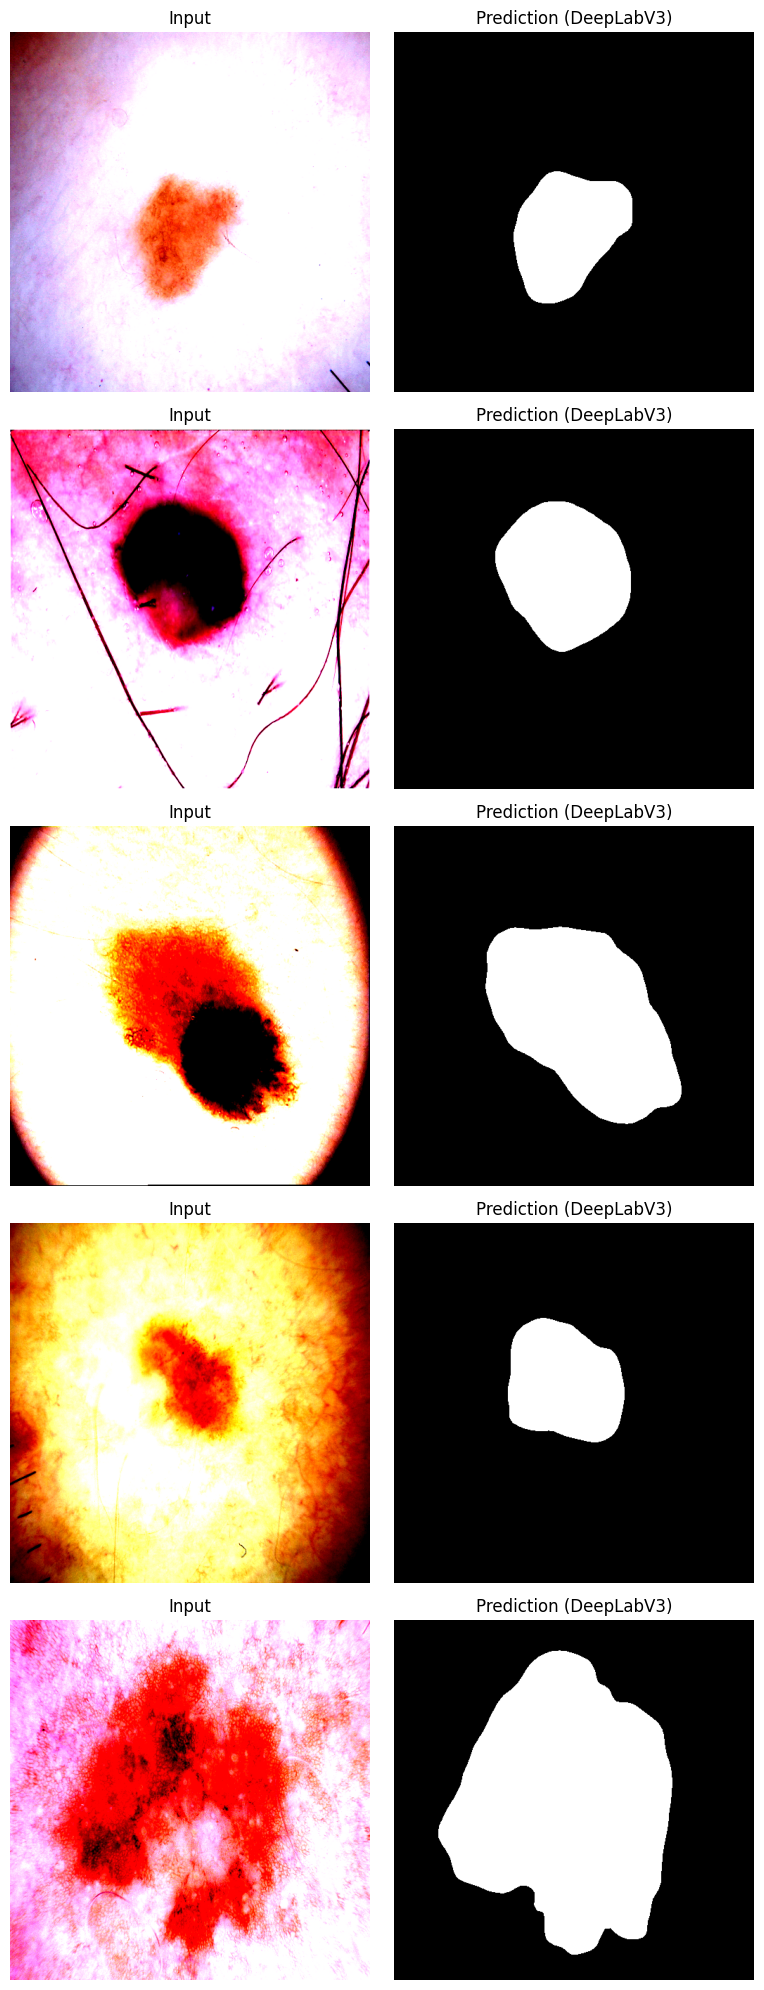

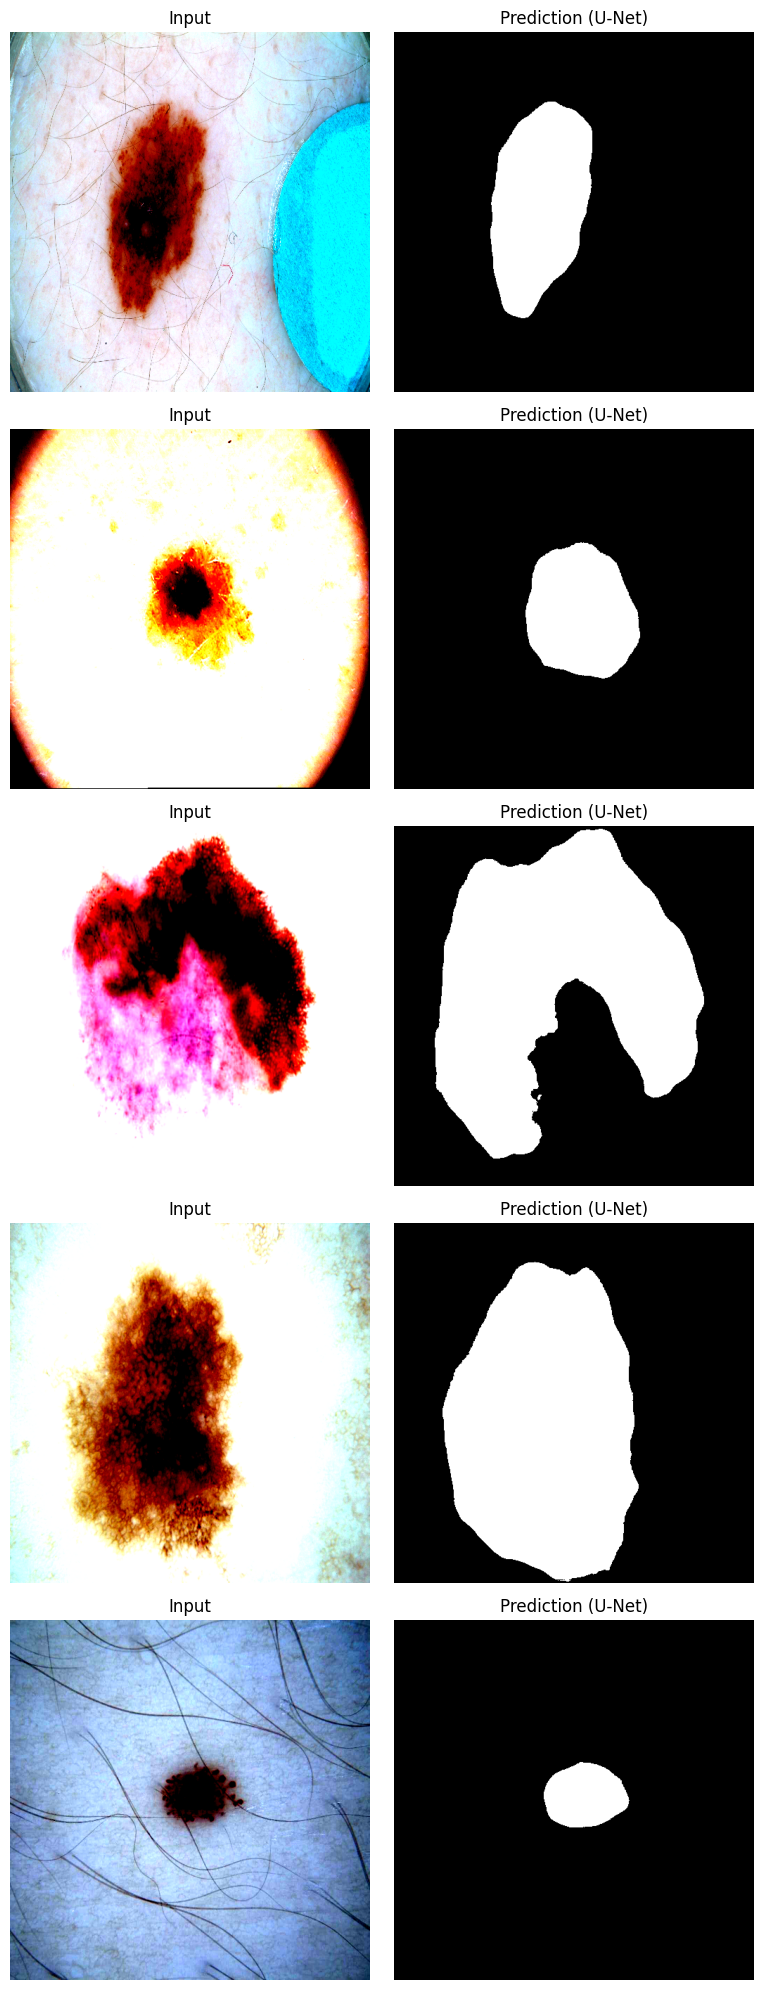

Visualization complete.


In [12]:
# 4. Tự động ghép đôi ảnh ↔ mask cho tập train
def make_pairs(img_dir, mask_dir):
    img_paths = sorted(glob(os.path.join(img_dir, '*')))
    mask_paths = sorted(glob(os.path.join(mask_dir, '*')))
    paired = []
    for img_p in img_paths:
        img_base = os.path.splitext(os.path.basename(img_p))[0]
        match = [m for m in mask_paths if os.path.splitext(os.path.basename(m))[0].startswith(img_base)]
        if match:
            paired.append((img_p, match[0]))
    print(f"Paired {len(paired)} samples (out of {len(img_paths)} images, {len(mask_paths)} masks)")
    return paired

# Ghép đôi và chia tập train/validation (9:1)
all_pairs = make_pairs(TRAIN_IMG_DIR, TRAIN_MASK_DIR)
train_pairs, val_pairs = train_test_split(all_pairs, test_size=0.1, random_state=42)  # 90% train, 10% val
test_img_paths = sorted(glob(os.path.join(TEST_IMG_DIR, '*')))  # Chỉ lấy ảnh test

print(f"Train samples after split: {len(train_pairs)}")
print(f"Validation samples: {len(val_pairs)}")

# 5. Dataset class
class MedicalDataset(Dataset):
    def __init__(self, pairs, transforms=None, has_mask=True):
        self.pairs = pairs
        self.transforms = transforms
        self.has_mask = has_mask
    def __len__(self):
        return len(self.pairs)
    def __getitem__(self, idx):
        img_path = self.pairs[idx][0] if self.has_mask else self.pairs[idx]
        img = cv2.imread(img_path)
        if img is None:
            raise ValueError(f"Cannot read {img_path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.has_mask:
            mask_path = self.pairs[idx][1]
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is None:
                raise ValueError(f"Cannot read {mask_path}")
            mask = (mask > 127).astype('float32')  # Nhị phân hóa mask
            if self.transforms:
                aug = self.transforms(image=img, mask=mask)
                img, mask = aug['image'], aug['mask']
            return img, mask.unsqueeze(0)
        else:
            if self.transforms:
                aug = self.transforms(image=img)
                img = aug['image']
            return img

# 6. Transforms
train_transforms = A.Compose([
    A.Resize(512, 512),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])
val_test_transforms = A.Compose([
    A.Resize(512, 512),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
])

# 7. Build Datasets & DataLoaders
train_ds = MedicalDataset(train_pairs, transforms=train_transforms, has_mask=True)
val_ds   = MedicalDataset(val_pairs, transforms=val_test_transforms, has_mask=True)
test_ds  = MedicalDataset(test_img_paths, transforms=val_test_transforms, has_mask=False)
print("Train samples:", len(train_ds))
print("Validation samples:", len(val_ds))
print("Test  samples:", len(test_ds))

train_loader = DataLoader(train_ds, batch_size=4, shuffle=True,  num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=1, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=1, shuffle=False, num_workers=2, pin_memory=True)

# 8. Model, Loss, Optimizer, TensorBoard
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Khởi tạo DeepLabv3
model_deeplab = deeplabv3_resnet50(weights='COCO_WITH_VOC_LABELS_V1', progress=True)
model_deeplab.classifier[-1] = nn.Conv2d(256, 1, kernel_size=1)
model_deeplab.aux_classifier[-1] = nn.Conv2d(256, 1, kernel_size=1)
model_deeplab = model_deeplab.to(device)

# Khởi tạo U-Net
model_unet = smp.Unet(
    encoder_name="resnet50",  # Sử dụng backbone ResNet50
    encoder_weights="imagenet",  # Pretrained trên ImageNet
    in_channels=3,  # Ảnh RGB
    classes=1,  # 1 lớp cho phân vùng nhị phân
).to(device)

# Loss và Metrics
bce = nn.BCEWithLogitsLoss()
def dice_score(pred, target, smooth=1e-6):
    pred_flat = torch.sigmoid(pred).view(-1)
    target_flat = target.view(-1)
    inter = (pred_flat * target_flat).sum()
    return ((2 * inter + smooth) / (pred_flat.sum() + target_flat.sum() + smooth))

def metrics(pred, mask):
    pred = pred.view(-1)
    mask = mask.view(-1)
    TP = (pred * mask).sum().item()
    FP = (pred * (1 - mask)).sum().item()
    FN = ((1 - pred) * mask).sum().item()
    precision = TP / (TP + FP + 1e-6)
    recall = TP / (TP + FN + 1e-6)
    f1 = 2 * precision * recall / (precision + recall + 1e-6)
    return precision, recall, f1

optimizer_deeplab = torch.optim.Adam(model_deeplab.parameters(), lr=1e-4)
optimizer_unet = torch.optim.Adam(model_unet.parameters(), lr=1e-4)
writer = SummaryWriter(log_dir='runs/Medical_Segmentation_2025')

# 9. Training & Validation loop
EPOCHS = 10
models = {'DeepLabV3': model_deeplab, 'U-Net': model_unet}
optimizers = {'DeepLabV3': optimizer_deeplab, 'U-Net': optimizer_unet}

for model_name, model in models.items():
    optimizer = optimizers[model_name]
    print(f"\nTraining {model_name}")
    for epoch in range(1, EPOCHS + 1):
        # Training
        model.train()
        train_loss = 0.0
        for step, (imgs, masks) in enumerate(tqdm(train_loader, desc=f"{model_name} Epoch {epoch} Train")):
            imgs, masks = imgs.to(device), masks.to(device)
            optimizer.zero_grad()
            out = model(imgs)['out'] if model_name == 'DeepLabV3' else model(imgs)
            loss = bce(out, masks) * 0.5 + (1 - dice_score(out, masks)) * 0.5
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            if (step + 1) % 20 == 0:
                writer.add_scalar(f'Train/Batch Loss/{model_name}', loss.item(), epoch * len(train_loader) + step)
        avg_train_loss = train_loss / len(train_loader)
        writer.add_scalar(f'Train/Epoch Loss/{model_name}', avg_train_loss, epoch)

        # Validation
        model.eval()
        val_loss = 0.0
        iou_list, dice_list, prec_list, rec_list, f1_list = [], [], [], [], []
        with torch.no_grad():
            for imgs, masks in tqdm(val_loader, desc=f"{model_name} Epoch {epoch} Validate"):
                imgs, masks = imgs.to(device), masks.to(device)
                out = model(imgs)['out'] if model_name == 'DeepLabV3' else model(imgs)
                loss = bce(out, masks) * 0.5 + (1 - dice_score(out, masks)) * 0.5
                val_loss += loss.item()
                prob = torch.sigmoid(out)
                pred = (prob > 0.5).float()
                inter = (pred * masks).sum((1, 2, 3))
                union = pred.sum((1, 2, 3)) + masks.sum((1, 2, 3)) - inter
                iou = ((inter + 1e-6) / (union + 1e-6)).mean().item()
                dice = dice_score(out, masks).item()
                p, r, f1 = metrics(pred, masks)
                iou_list.append(iou)
                dice_list.append(dice)
                prec_list.append(p)
                rec_list.append(r)
                f1_list.append(f1)
        avg_val_loss = val_loss / len(val_loader)
        avg_iou = np.mean(iou_list)
        avg_dice = np.mean(dice_list)
        avg_prec = np.mean(prec_list)
        avg_rec = np.mean(rec_list)
        avg_f1 = np.mean(f1_list)
        writer.add_scalar(f'Val/Epoch Loss/{model_name}', avg_val_loss, epoch)
        writer.add_scalar(f'Val/IoU/{model_name}', avg_iou, epoch)
        writer.add_scalar(f'Val/Dice/{model_name}', avg_dice, epoch)
        writer.add_scalar(f'Val/Precision/{model_name}', avg_prec, epoch)
        writer.add_scalar(f'Val/Recall/{model_name}', avg_rec, epoch)
        writer.add_scalar(f'Val/F1/{model_name}', avg_f1, epoch)

        print(f"{model_name} Epoch {epoch} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
        print(f"        IoU: {avg_iou:.4f} | Dice: {avg_dice:.4f} | Prec: {avg_prec:.4f} | Rec: {avg_rec:.4f} | F1: {avg_f1:.4f}\n")

# 10. Xem TensorBoard
print("Run this in terminal: tensorboard --logdir runs/Medical_Segmentation_2025 --bind_all")

# 11. Visualize Predictions on Test Set
import random
import matplotlib.pyplot as plt

def visualize_predictions(model, model_name, dataset, device, n=5):
    model.eval()
    indices = random.sample(range(len(dataset)), n)
    fig, axes = plt.subplots(n, 2, figsize=(8, 4 * n))
    with torch.no_grad():
        for i, idx in enumerate(indices):
            img = dataset[idx]
            inp = img.unsqueeze(0).to(device)
            out = torch.sigmoid(model(inp)['out'] if model_name == 'DeepLabV3' else model(inp))[0, 0].cpu().numpy()
            pred_mask = (out > 0.5).astype(np.uint8)
            axes[i, 0].imshow(img.permute(1, 2, 0).cpu())
            axes[i, 0].axis('off')
            axes[i, 0].set_title('Input')
            axes[i, 1].imshow(pred_mask, cmap='gray')
            axes[i, 1].axis('off')
            axes[i, 1].set_title(f'Prediction ({model_name})')
    plt.tight_layout()
    plt.show()

for model_name, model in models.items():
    visualize_predictions(model, model_name, test_ds, device, n=5)
print('Visualization complete.')